Approach that I will use:
1. Cluster customers with ```churn = 0```
2. Predict for customers with ```churn = 1```
3. Visualize results to see which clusters of customers have ```churn = 1```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

%matplotlib inline
np.random.seed(59)

# set the max columns to none
pd.set_option('display.max_columns', None)

In [2]:
train_path = 'D:\\machine learning\\ml projects\\Main Pet Project for May-June 2022\\Customer Churn Prediction\\preprocessed_data\\train.csv'

df = pd.read_csv(train_path)
df.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_minutes,total_calls,total_charge,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,state_MD,state_MN,state_NJ,state_TX,state_WV,state_other
0,107,0,1,26,13.7,3,3.70,1,0,611.5,329,55.54,0,1,0,0,0,0,0,0,1
1,137,0,0,0,12.2,5,3.29,0,0,527.2,328,59.00,0,1,0,0,0,1,0,0,0
2,84,1,0,0,6.6,7,1.78,2,0,558.2,248,65.02,1,0,0,0,0,0,0,0,1
3,75,1,0,0,10.1,3,2.73,3,0,501.9,356,49.36,0,1,0,0,0,0,0,0,1
4,121,0,1,24,7.5,7,2.03,3,0,779.3,314,76.28,0,0,1,0,0,0,0,0,1


In [3]:
df_train = df[df['churn'] == 0].drop('churn', axis=1)
df_test = df[df['churn'] == 1].drop('churn', axis=1)

print('Churn shape:', df_test.shape)
print('Not churn shape:', df_train.shape)

Churn shape: (598, 20)
Not churn shape: (3652, 20)


It is important to scale the data

In [4]:
st_scaler = StandardScaler()

train_st = st_scaler.fit_transform(df_train)
test_st = st_scaler.transform(df_test)

We will do it with PCA

In [5]:
pca = PCA(.95) 
pca.fit(train_st)

train_pca = pca.transform(train_st)
df_train_pca = pd.DataFrame(train_pca)
test_pca = pca.transform(test_st)
df_test_pca = pd.DataFrame(test_pca)

print(f'''Shape of X_train before PCA: {df_train.shape}
      Shape of X_train after PCA: {df_train_pca.shape}''')
print(f'''Shape of X_test before PCA: {df_test.shape}
      Shape of X_test after PCA: {df_test_pca.shape}''')

Shape of X_train before PCA: (3652, 20)
      Shape of X_train after PCA: (3652, 15)
Shape of X_test before PCA: (598, 20)
      Shape of X_test after PCA: (598, 15)


Check the elbow, to determine what is the optimal number of clusters

In [6]:
km_list = list()

for i in range(1, 30):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=59)
    km = km.fit(df_train_pca)
    
    km_list.append(pd.Series({'clusters': i, 
                              'inertia': km.inertia_,
                              'model': km}))

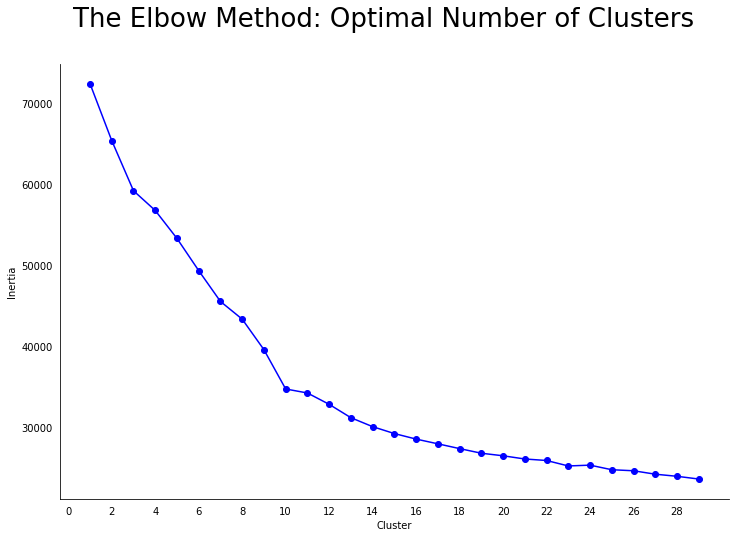

In [7]:
k = pd.concat(km_list, axis=1).T[['clusters','inertia']]

# Visualize
fig, ax = plt.subplots(figsize =(12, 8))
fig.patch.set_facecolor('white')

plt.plot(k['clusters'], k['inertia'], 'bo-')

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top','right']:
    ax.spines[i].set_visible(False)

ax.set_xticks(range(0, 30, 2))
ax.set(xlabel='Cluster', ylabel='Inertia')

plt.suptitle('The Elbow Method: Optimal Number of Clusters', size=26)
plt.show()

15 clusters is enough

In [8]:
km = KMeans(n_clusters=15, init='k-means++', max_iter=100, n_init=30, random_state=59)
km = km.fit(df_train_pca)

results_not_churn = km.predict(df_train_pca)
results_churn = km.predict(df_test_pca)

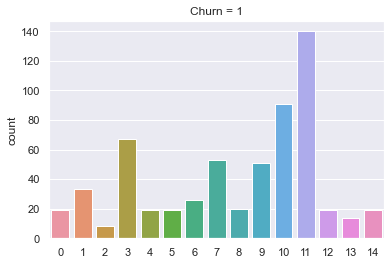

In [9]:
sns.set(style="darkgrid")

ax = sns.countplot(x=results_churn).set_title('Churn = 1')
plt.show()

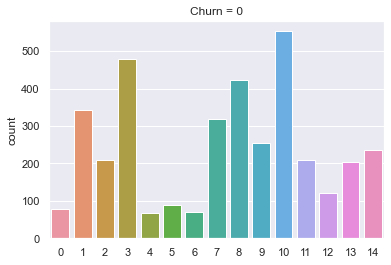

In [10]:
import seaborn as sns
sns.set(style="darkgrid")

ax = sns.countplot(x=results_not_churn).set_title('Churn = 0')
plt.show()

Summing up, there is no such clusters, so that there will be no churn customers